# Auditing the Used Car Data

## Importing the libraries

In [21]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style('whitegrid')

## Data Loading and Initial Inspection

### Data Loading

In [22]:
file_path = "vehicles.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "austinreese/craigslist-carstrucks-data",
  file_path,
)


/tmp/ipython-input-2143775640.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'craigslist-carstrucks-data' dataset.


In [23]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 240)

### Initial Inspection

In [24]:
print("Initial DataFrame Info")
df.info()

Initial DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-

In [25]:
print("First 5 Rows")
display(df.head())

First 5 Rows


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [26]:
print("Summary Statistics")
display(df.describe())

Summary Statistics


,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


- Price: Min is $0 and max is extremely high, indicating significant outliers.
- Odometer: Min is 0, which is unlikely for a used car, and max is very high.

## Data Cleaning and Curation

### Handling Missing Values

In [27]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100
print("--- Percentage of Missing Values ---")
print(missing_percentage.sort_values(ascending=False))

--- Percentage of Missing Values ---
county          100.000000
size             71.767476
cylinders        41.622470
condition        40.785232
VIN              37.725356
drive            30.586347
paint_color      30.501078
type             21.752717
manufacturer      4.133714
title_status      1.930753
lat               1.534155
long              1.534155
model             1.236179
odometer          1.030735
fuel              0.705819
transmission      0.598763
year              0.282281
description       0.016398
posting_date      0.015930
image_url         0.015930
region_url        0.000000
url               0.000000
id                0.000000
region            0.000000
price             0.000000
state             0.000000
dtype: float64


**Drop columns with a high percentage of missing values**

*county* is 100% empty, and *size* is over 70% empty, making them impossible to use reliably. *VIN* is a unique identifier; while useful for tracking a specific car, it has no predictive power for a general price prediction model and acts as noise. We drop them to simplify the dataset and remove irrelevant information.

In [28]:
columns_to_drop = ["county", "size", "VIN"]
df.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns: {columns_to_drop}")

Dropped columns: ['county', 'size', 'VIN']


**Drop rows where essential features are missing (low missing %)**

A car's *manufacturer* and *model* are fundamental to its value. Guessing these would be highly unreliable and could introduce significant errors. Since only a small percentage of rows are missing this data, dropping them is the safest choice to ensure the core integrity of our dataset.

In [29]:
essential_cols = ["manufacturer", "model"]
df.dropna(subset=essential_cols, inplace=True)
print(f"Dropped rows with missing essential data. Shape is now: {df.shape}")

Dropped rows with missing essential data. Shape is now: (404026, 23)


**Impute categorical columns with the mode**

For features like *condition* or *cylinders*, the most frequent value (mode) is a reasonable and common-sense substitute for a missing value. This imputation strategy preserves the column's overall distribution without deleting valuable rows.

In [30]:
categorical_cols_mode = ["condition", "cylinders", "title_status", "fuel", "transmission", "drive", "type"]
for col in categorical_cols_mode:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
    print(f"Filled missing '{col}' values with mode: '{mode_val}'")

Filled missing 'condition' values with mode: 'good'
Filled missing 'cylinders' values with mode: '6 cylinders'
Filled missing 'title_status' values with mode: 'clean'


/tmp/ipython-input-3235436277.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


Filled missing 'fuel' values with mode: 'gas'
Filled missing 'transmission' values with mode: 'automatic'
Filled missing 'drive' values with mode: '4wd'
Filled missing 'type' values with mode: 'sedan'


**Impute paint_color with 'unknown'**

Unlike other features, the absence of a specified color might be a signal in itself. Instead of guessing the most common color, we create a distinct 'unknown' category.

In [31]:
df["paint_color"].fillna("unknown", inplace=True)
print("Filled missing 'paint_color' values with 'unknown'")

Filled missing 'paint_color' values with 'unknown'


/tmp/ipython-input-2148737617.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["paint_color"].fillna("unknown", inplace=True)


**Impute numerical columns with the median**

We choose the median over the mean because it is robust to outliers. Features like *odometer* can have extreme values that would significantly skew the mean. The median provides a more realistic and stable measure of the central tendency for these skewed distributions.

In [32]:
numerical_cols_median = ["odometer", "year", "lat", "long"]
for col in numerical_cols_median:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    print(f"Filled missing '{col}' values with median: {median_val}")

Filled missing 'odometer' values with median: 85731.0
Filled missing 'year' values with median: 2014.0
Filled missing 'lat' values with median: 39.149003
Filled missing 'long' values with median: -88.435925


/tmp/ipython-input-684031761.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


After our targeted imputation, there might be a few remaining null values in other columns. This single line of code removes any row that still contains a null value.

In [33]:
df.dropna(inplace=True)
print("Missing Values After Handling")
print(df.isnull().sum().sum())

Missing Values After Handling
0


### Identifying and Handling Outliers

The initial inspection revealed prices of $0 along with vehicles with extreme mileage. We apply logical thresholds to focus the dataset on a realistic range.

In [34]:
print(f"Dataset size before outlier removal: {len(df)} rows")

# Define reasonable ranges
price_min_threshold = 500
price_max_threshold = 150000
odometer_max_threshold = 500000

# Apply filters
df = df[df["price"].between(price_min_threshold, price_max_threshold)]
df = df[df["odometer"] <= odometer_max_threshold]

print(f"Dataset size after outlier removal: {len(df)} rows")

Dataset size before outlier removal: 404024 rows
Dataset size after outlier removal: 363905 rows


### Correcting Data Types and Removing Duplicates

**Check for duplicates**

Exact duplicate rows can bias a model by giving undue weight to a single listing. They provide no new information and should be removed.

In [35]:
print(f"Number of duplicate rows found: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Dataset size after dropping duplicates: {len(df)} rows")

Number of duplicate rows found: 0
Dataset size after dropping duplicates: 363905 rows


**Correct data types**

The *year* column was loaded as a float (e.g., 2015.0). This is semantically incorrect; a year should be an integer.

In [36]:
df['year'] = df['year'].astype(int)
print("\nConverted 'year' column to integer type.")


Converted 'year' column to integer type.


In [37]:
print("\n--- Final DataFrame Info After Cleaning ---")
df.info()


--- Final DataFrame Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 363905 entries, 27 to 426879
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            363905 non-null  int64  
 1   url           363905 non-null  object 
 2   region        363905 non-null  object 
 3   region_url    363905 non-null  object 
 4   price         363905 non-null  int64  
 5   year          363905 non-null  int64  
 6   manufacturer  363905 non-null  object 
 7   model         363905 non-null  object 
 8   condition     363905 non-null  object 
 9   cylinders     363905 non-null  object 
 10  fuel          363905 non-null  object 
 11  odometer      363905 non-null  float64
 12  title_status  363905 non-null  object 
 13  transmission  363905 non-null  object 
 14  drive         363905 non-null  object 
 15  type          363905 non-null  object 
 16  paint_color   363905 non-null  object 
 17  image_u

## Exploratory Data Analysis (EDA)

### Understand Distributions

We create histograms to understand the distributions of our key numerical features.

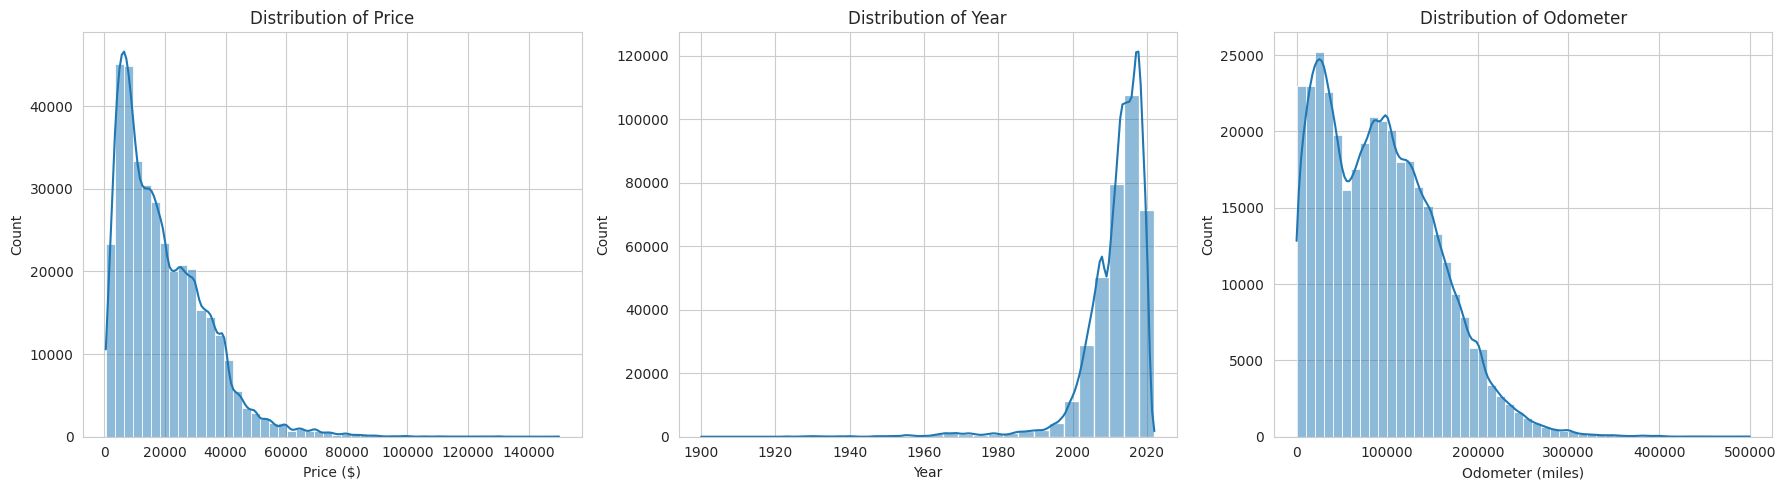

In [38]:
plt.figure(figsize=(18, 5))

# Price distribution
plt.subplot(1, 3, 1)
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price ($)")

# Year distribution
plt.subplot(1, 3, 2)
sns.histplot(df["year"], bins=30, kde=True)
plt.title("Distribution of Year")
plt.xlabel("Year")

# Odometer distribution
plt.subplot(1, 3, 3)
sns.histplot(df["odometer"], bins=50, kde=True)
plt.title("Distribution of Odometer")
plt.xlabel("Odometer (miles)")

plt.tight_layout()
plt.show()

We can quickly see that *price* and *odometer* are right-skewed (most cars cluster at lower values), while *year* is left-skewed (most cars are from recent years).

### Explore Relationships

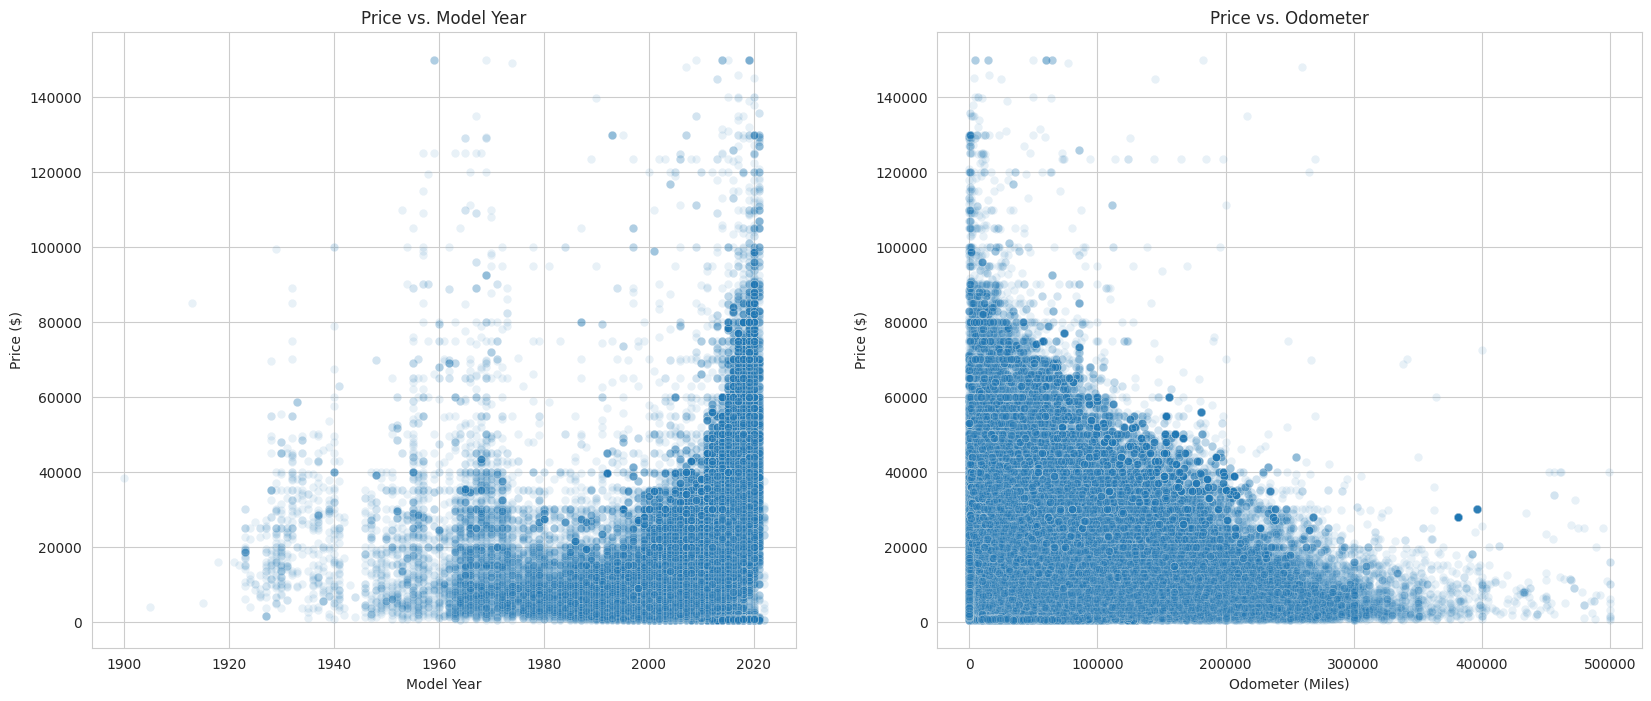

In [46]:
plt.figure(figsize=(20, 8))

# Relationship between price and year
plt.subplot(1, 2, 1)
sns.scatterplot(x="year", y="price", data=df, alpha=0.1)
plt.title("Price vs. Model Year")
plt.xlabel("Model Year")
plt.ylabel("Price ($)")

# Relationship between Odometer and price
plt.subplot(1, 2, 2)
sns.scatterplot(x="odometer", y="price", data=df, alpha=0.1)
plt.title("Price vs. Odometer")
plt.xlabel("Odometer (Miles)")
plt.ylabel("Price ($)")
plt.show()

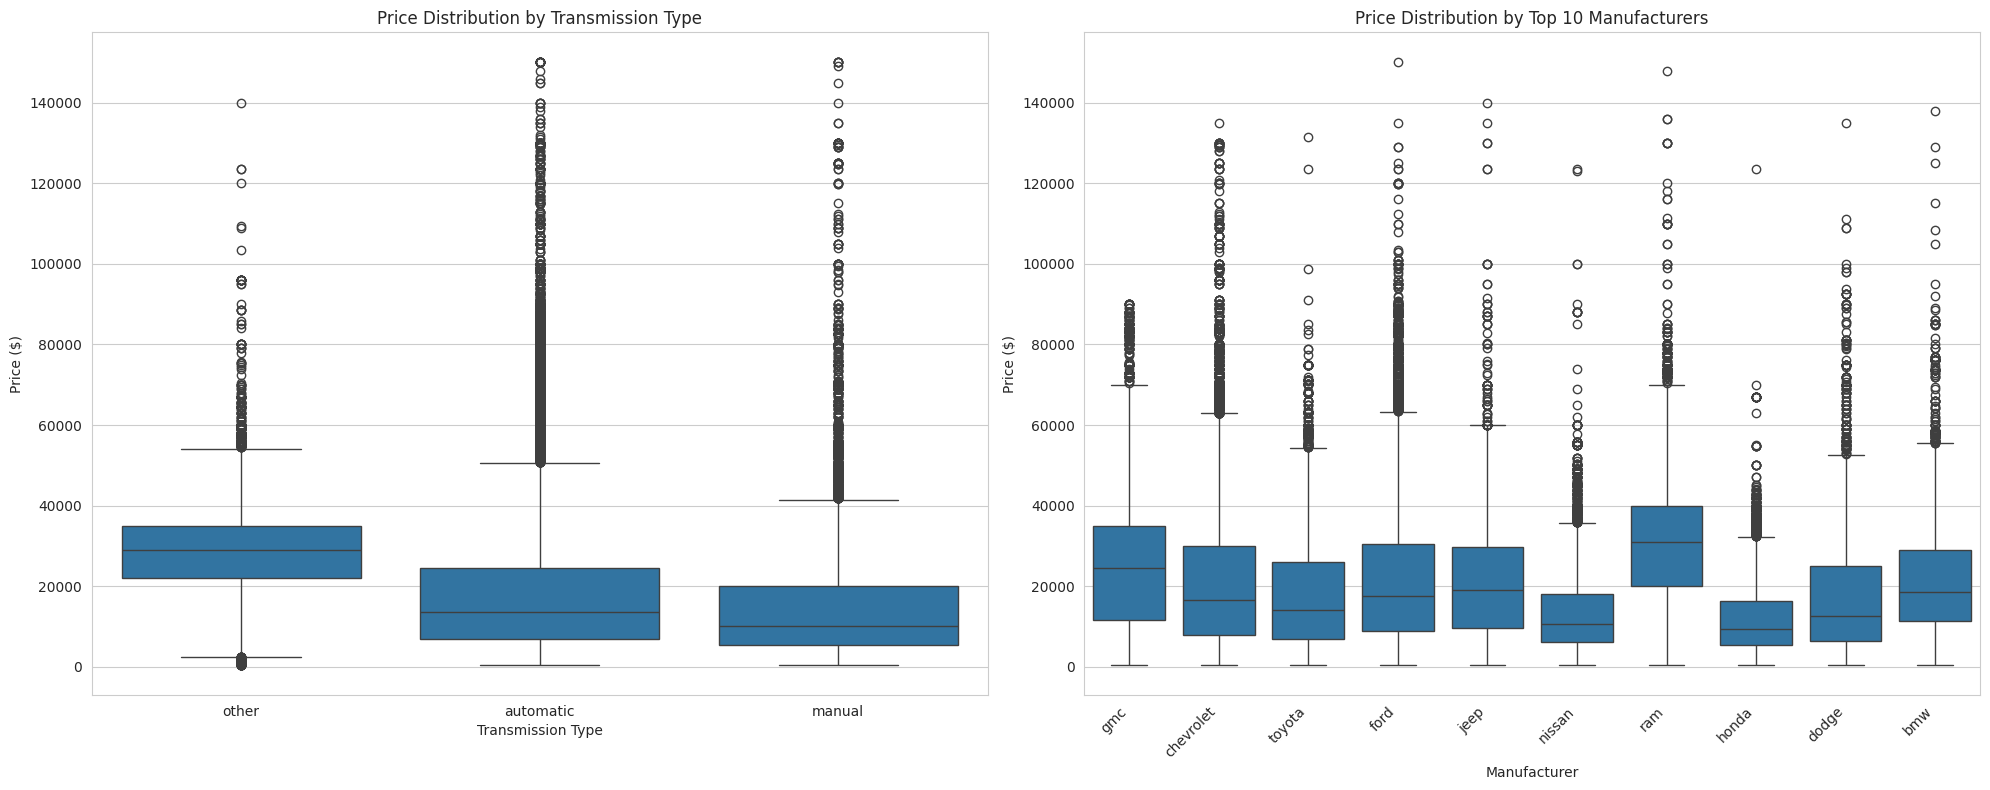

In [48]:
plt.figure(figsize=(20, 8))

# Price by Transmission Type
plt.subplot(1, 2, 1)
sns.boxplot(x="transmission", y="price", data=df)
plt.title("Price Distribution by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Price ($)")

# Price by Manufacturer
plt.subplot(1, 2, 2)
top_manufacturers = df["manufacturer"].value_counts().nlargest(10).index  # Top 10 most frequent manufacturers
df_top_manu = df[df["manufacturer"].isin(top_manufacturers)]

sns.boxplot(x="manufacturer", y="price", data=df_top_manu)
plt.title("Price Distribution by Top 10 Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Price ($)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

### Answer Questions

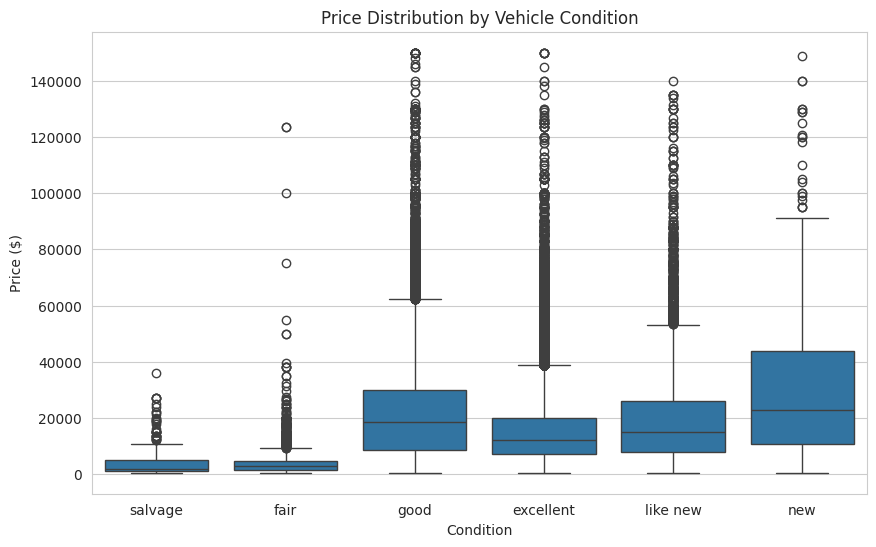

In [39]:
# Question 1: How does vehicle condition affect price?
condition_order = ["salvage", "fair", "good", "excellent", "like new", "new"]
plt.figure(figsize=(10, 6))
sns.boxplot(x="condition", y="price", data=df, order=condition_order)
plt.title("Price Distribution by Vehicle Condition")
plt.xlabel("Condition")
plt.ylabel("Price ($)")
plt.show()

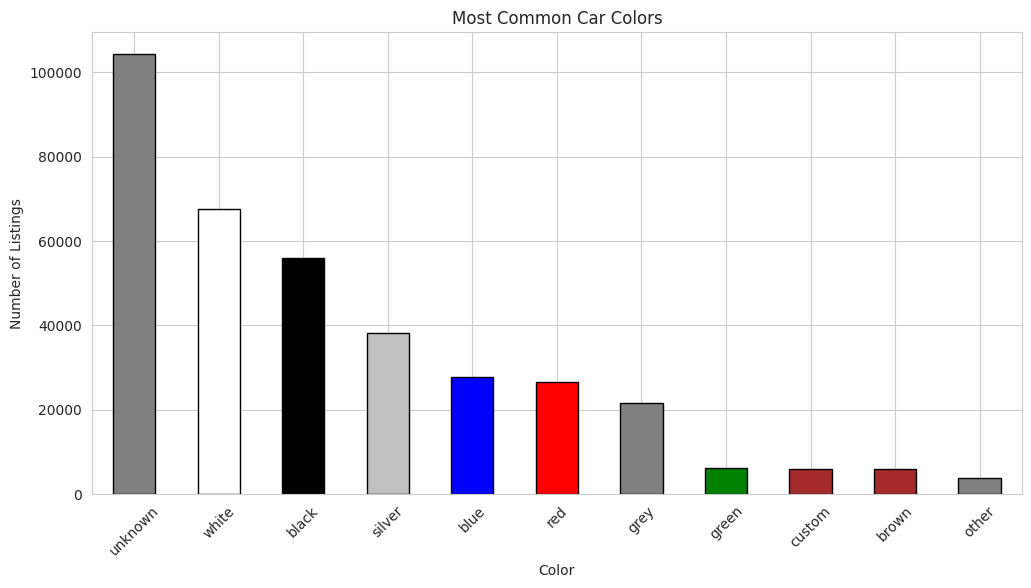

In [40]:
# Question 2: Which car color is most common?
plt.figure(figsize=(12, 6))
# Combine less frequent colors into 'other' for better visualization
top_colors = df["paint_color"].value_counts().nlargest(10).index
df["plot_color"] = df["paint_color"].where(df["paint_color"].isin(top_colors), "other")

# Create a list of colors
color_map = {color.lower(): color.lower() for color in df["plot_color"].unique() if color.lower() not in ["unknown", "custom"]}
if "unknown" in df["plot_color"].unique():
    color_map["unknown"] = "grey"
if "other" in df["plot_color"].unique():
    color_map["other"] = "grey"
if "custom" in df["plot_color"].unique():
    color_map["custom"] = "brown" # Mapping 'custom' to a valid color

plot_colors = [color_map[color.lower()] for color in df["plot_color"].value_counts().index]

df["plot_color"].value_counts().plot(kind="bar", color=plot_colors, edgecolor="black")
plt.title("Most Common Car Colors")
plt.xlabel("Color")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()
df.drop(columns=["plot_color"], inplace=True) # Remove the temporary column

## Simple Feature Engineering

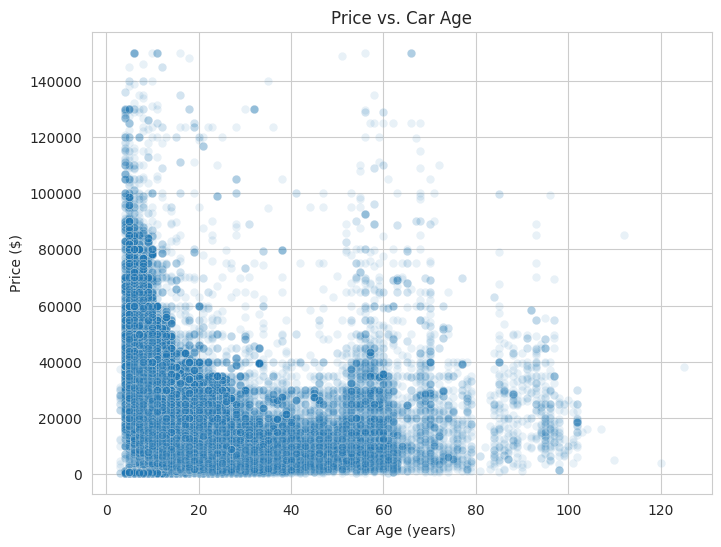

In [41]:
# Create a new column for car_age
df["car_age"] = 2025 - df["year"]

# Scatter plot: Price vs. new car_age feature
plt.figure(figsize=(8, 6))
sns.scatterplot(x="car_age", y="price", data=df, alpha=0.1)
plt.title("Price vs. Car Age")
plt.xlabel("Car Age (years)")
plt.ylabel("Price ($)")
plt.show()


##  Final Summary

In [42]:
# Print the final shape of the cleaned data
print("Final Data State ")
print(f"The cleaned dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print("The data is now ready for baseline model building.")

Final Data State 
The cleaned dataset contains 363905 rows and 24 columns.
The data is now ready for baseline model building.
